<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20LR-DNN%20for%205%20class%20classifications%20based%20on%20WSN-DS%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid LR-DNN for 5 class classifications based on WSN-DS dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")
dataset = dataset.dropna() # Remove missing values
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

In [3]:
dataset.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Class               0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

### **Data preprocessing**

In [19]:
# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [21]:
# Standardize features
##scaler = StandardScaler()
##X = scaler.fit_transform(X)

In [22]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Hybrid combination of LR and DNN for 5 class classifications**

In [24]:
# Train logistic regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)
print(classification_report(y_test, lr_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.901095669664124
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     67557
           1       0.96      0.60      0.74     68077
           2       0.72      1.00      0.84     68330
           3       0.99      0.93      0.96     68180
           4       1.00      1.00      1.00     67922

    accuracy                           0.90    340066
   macro avg       0.92      0.90      0.90    340066
weighted avg       0.92      0.90      0.90    340066



In [25]:
# Train DNN model
num_classes = len(np.unique(y))
input_dim = X_train.shape[1]
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim=input_dim, activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))
dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
y_train_onehot = to_categorical(y_train)
dnn_model.fit(X_train, y_train_onehot, epochs=15, batch_size=32, verbose=0)
dnn_pred = dnn_model.predict(X_test)
dnn_pred = np.argmax(dnn_pred, axis=1)
dnn_acc = accuracy_score(y_test, dnn_pred)
print("DNN Accuracy:", dnn_acc)
print(classification_report(y_test, dnn_pred))

10628/10628 [==============================] - 14s 1ms/step
DNN Accuracy: 0.9851087730028877
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     67557
           1       1.00      0.98      0.99     68077
           2       0.98      1.00      0.99     68330
           3       0.99      0.96      0.98     68180
           4       1.00      1.00      1.00     67922

    accuracy                           0.99    340066
   macro avg       0.99      0.99      0.99    340066
weighted avg       0.99      0.99      0.99    340066



In [26]:
# Combine predictions
lr_probs = lr_model.predict_proba(X_test)
dnn_probs = dnn_model.predict(X_test)
combined_probs = (lr_probs + dnn_probs) / 2
combined_pred = np.argmax(combined_probs, axis=1)
combined_acc = accuracy_score(y_test, combined_pred)
print("Combined Accuracy:", combined_acc)
print(classification_report(y_test, combined_pred))

10628/10628 [==============================] - 14s 1ms/step
Combined Accuracy: 0.981415372310081
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     67557
           1       1.00      0.97      0.99     68077
           2       0.97      1.00      0.99     68330
           3       1.00      0.94      0.97     68180
           4       1.00      1.00      1.00     67922

    accuracy                           0.98    340066
   macro avg       0.98      0.98      0.98    340066
weighted avg       0.98      0.98      0.98    340066



In [27]:
# Create confusion matrix for combined model
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
combined_cm = confusion_matrix(y_test, combined_pred)
print("Combined Model Confusion Matrix:")
print(combined_cm)

Combined Model Confusion Matrix:
[[67330    96     0    58    73]
 [    5 66250  1820     2     0]
 [    0    50 68280     0     0]
 [ 4167    38    11 63964     0]
 [    0     0     0     0 67922]]


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  ax.yaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

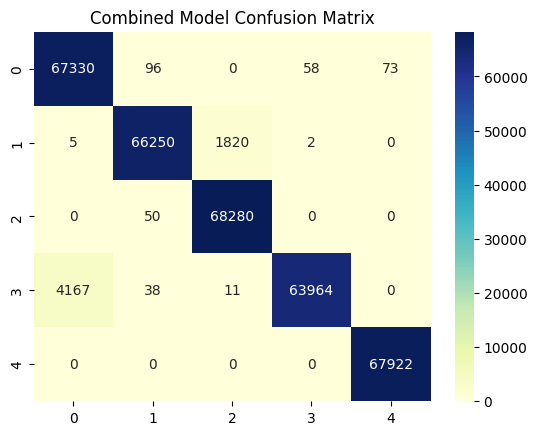

In [28]:
# Plot confusion matrix for combined model
sns.heatmap(combined_cm, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Combined Model Confusion Matrix")
plt.show()

In [ ]:
print("Confusion Matrix of Hybrid LR-RNN Model") 
conf_mat(np.argmax(y_test, axis=1), y_pred)